In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
data_path = './data'
df_emergencies_raw = pd.read_excel(f'{data_path}/Urgencias.xlsx', index_col=0).reset_index()
df_emergencies_raw.head()

,Numero_Identificacion,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,1759148,2019-09-29,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1,1110797,2019-07-20,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,1
2,1497880,2019-07-21,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3,1598583,2019-06-18,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,525540,2019-06-11,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1


In [3]:
df_emergencies_raw.columns = [col.lower() for col in df_emergencies_raw.columns]
df_emergencies_raw.rename(columns={
    'numero_identificacion': 'id_paciente',   
}, inplace=True)
df_emergencies_raw.head()

,id_paciente,fecha_emision,regional_eps_desc,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
0,1759148,2019-09-29,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1,1110797,2019-07-20,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,1
2,1497880,2019-07-21,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3,1598583,2019-06-18,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,525540,2019-06-11,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1


In [4]:
df_emergencies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 8 columns):
id_paciente                  5086 non-null int64
fecha_emision                5086 non-null datetime64[ns]
regional_eps_desc            5086 non-null object
codigo_prestacion_op         5086 non-null object
descripcion_prestacion       5086 non-null object
codigo_diagnostico_eps_op    5086 non-null object
diagnostico_eps_desc         5086 non-null object
cantidad_autorizada          5086 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 318.0+ KB


In [5]:
df_emergencies_raw.drop_duplicates()

,id_paciente,fecha_emision,regional_eps_desc,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
0,1759148,2019-09-29,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1,1110797,2019-07-20,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,1
2,1497880,2019-07-21,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3,1598583,2019-06-18,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,525540,2019-06-11,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
5,569467,2019-07-08,Armenia,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI...",1
6,1493731,2019-08-02,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...,1
7,979640,2019-07-17,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA,1
8,850509,2019-09-06,Cali,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO",1
9,1640782,2019-06-11,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO,1


In [6]:
len(df_emergencies_raw['id_paciente'].unique())

584

In [7]:
df_emergencies_raw['fecha_emision'].describe()

count                    5086
unique                    938
top       2019-07-16 00:00:00
freq                       38
first     2016-12-01 00:00:00
last      2020-06-01 00:00:00
Name: fecha_emision, dtype: object

In [8]:
df_emergencies_raw['descripcion_prestacion'].value_counts()

ATENCION MEDICA PRIORITARIA              3146
CONSULTA MEDICO GENERAL NO PROGRAMADA    1940
Name: descripcion_prestacion, dtype: int64

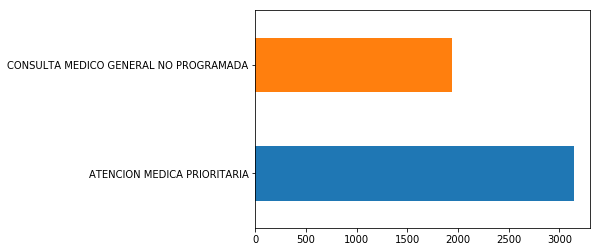

In [9]:
df_emergencies_raw['descripcion_prestacion'].value_counts().plot(kind='barh', x='Descripcion Prestacion')

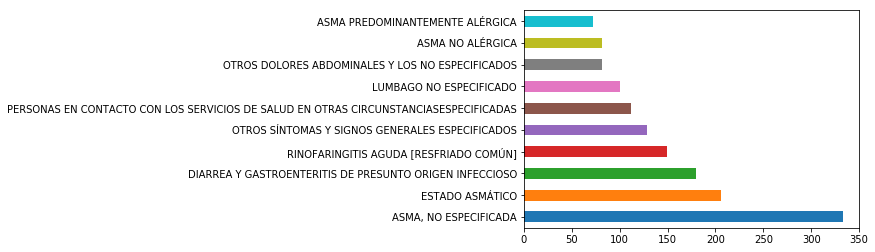

In [10]:
df_emergencies_raw['diagnostico_eps_desc'].value_counts()[1:11].plot(kind='barh', x='Diagnostico')

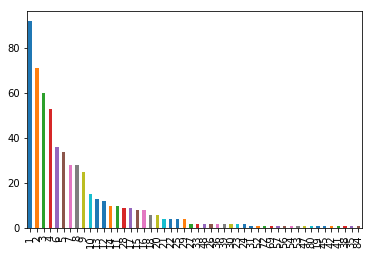

In [11]:
df_emergencies_raw['id_paciente'].value_counts().value_counts().plot.bar()

In [12]:
df_emergencies_raw[['id_paciente', 'fecha_emision', 'codigo_prestacion_op']].shape

(5086, 3)

In [13]:
df_emergencies_raw[['id_paciente', 'fecha_emision', 'codigo_prestacion_op']].drop_duplicates().shape

(2692, 3)

In [14]:
df_emergencies_raw.groupby(by=['id_paciente', 'fecha_emision', 'codigo_prestacion_op'], as_index=False).count().sort_values(by='codigo_diagnostico_eps_op',ascending=False)

,id_paciente,fecha_emision,codigo_prestacion_op,regional_eps_desc,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
1221,1108227,2019-07-15,S0050115,9,9,9,9,9
1890,1498916,2019-06-27,S0050115,6,6,6,6,6
650,840009,2019-06-19,S0050115,6,6,6,6,6
1597,1295239,2019-06-27,S0050115,6,6,6,6,6
364,692324,2019-06-10,S0050115,6,6,6,6,6
2242,1691670,2019-06-15,S0050115,6,6,6,6,6
406,706593,2019-06-17,S0050115,6,6,6,6,6
1251,1118363,2019-06-09,S0050115,6,6,6,6,6
484,747179,2019-03-04,S0050115,6,6,6,6,6
1889,1498916,2019-06-26,S0050115,6,6,6,6,6


In [15]:
df_emergencies_raw[df_emergencies_raw['id_paciente']==1108227]

,id_paciente,fecha_emision,regional_eps_desc,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
253,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
262,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,S525,FRACTURA DE LA EPÍFISIS INFERIOR DEL RADIO,1
1299,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1375,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,S525,FRACTURA DE LA EPÍFISIS INFERIOR DEL RADIO,1
3137,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3138,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,S525,FRACTURA DE LA EPÍFISIS INFERIOR DEL RADIO,1
3974,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4873,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4882,1108227,2019-07-15,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,S525,FRACTURA DE LA EPÍFISIS INFERIOR DEL RADIO,1


In [16]:
df_emergencies_raw[['id_paciente', 'fecha_emision', 'codigo_prestacion_op', 'codigo_diagnostico_eps_op']].shape

(5086, 4)

In [17]:
df_emergencies_raw[['id_paciente', 'fecha_emision', 'codigo_prestacion_op', 'codigo_diagnostico_eps_op']].drop_duplicates().shape

(2713, 4)

In [18]:
df_emergencies_raw.groupby(by=['id_paciente', 'fecha_emision', 'codigo_prestacion_op', 'codigo_diagnostico_eps_op'], as_index=False).count().sort_values(by='cantidad_autorizada',ascending=False)

,id_paciente,fecha_emision,codigo_prestacion_op,codigo_diagnostico_eps_op,regional_eps_desc,descripcion_prestacion,diagnostico_eps_desc,cantidad_autorizada
368,692324,2019-06-10,S0050115,Z759,6,6,6,6
1904,1498916,2019-06-26,S0050115,Z759,6,6,6,6
1611,1295239,2019-06-27,S0050115,Z759,6,6,6,6
2260,1691670,2019-06-15,S0050115,Z759,6,6,6,6
1262,1118363,2019-06-09,S0050115,J459,6,6,6,6
2569,1877468,2019-06-17,S0050115,F919,6,6,6,6
656,840009,2019-06-19,S0050115,Z759,6,6,6,6
410,706593,2019-06-17,S0050115,Z759,6,6,6,6
1905,1498916,2019-06-27,S0050115,A09X,6,6,6,6
1612,1295239,2019-08-01,S0050115,Z759,5,5,5,5


In [19]:
df_emergencies_raw[(df_emergencies_raw['fecha_emision']=="2019-06-10") & (df_emergencies_raw['id_paciente']==692324)]

,id_paciente,fecha_emision,regional_eps_desc,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
66,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1129,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
2444,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3820,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4552,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4686,692324,2019-06-10,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1


In [20]:
df_emergencies_raw.drop_duplicates().shape

(2713, 8)

## New CSV to load in DB


In [21]:
df_clean_emergencies = df_emergencies_raw.drop_duplicates().copy()

In [22]:
df_clean_emergencies.reset_index()

,index,id_paciente,fecha_emision,regional_eps_desc,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc,cantidad_autorizada
0,0,1759148,2019-09-29,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1,1,1110797,2019-07-20,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,1
2,2,1497880,2019-07-21,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3,3,1598583,2019-06-18,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,4,525540,2019-06-11,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
5,5,569467,2019-07-08,Armenia,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI...",1
6,6,1493731,2019-08-02,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...,1
7,7,979640,2019-07-17,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA,1
8,8,850509,2019-09-06,Cali,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO",1
9,9,1640782,2019-06-11,Cali,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO,1


In [23]:
df_clean_emergencies.shape

(2713, 8)

In [24]:
df_clean_emergencies = df_clean_emergencies[['id_paciente', 'regional_eps_desc', 'fecha_emision', 'codigo_prestacion_op', 'descripcion_prestacion', 'codigo_diagnostico_eps_op', 'diagnostico_eps_desc']].copy()

In [25]:
df_clean_emergencies

,id_paciente,regional_eps_desc,fecha_emision,codigo_prestacion_op,descripcion_prestacion,codigo_diagnostico_eps_op,diagnostico_eps_desc
0,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
1,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
2,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
3,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
5,569467,Armenia,2019-07-08,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI..."
6,1493731,Cali,2019-08-02,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...
7,979640,Cali,2019-07-17,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA
8,850509,Cali,2019-09-06,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO"
9,1640782,Cali,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO


In [26]:
df_clean_emergencies.rename(columns={
    'id_paciente': 'id_patient',
    'regional_eps_desc': 'regional_health_provider', 
    'fecha_emision':'registration_date',
    'codigo_prestacion_op': 'code_service', 
    'descripcion_prestacion':'description_service',
    'codigo_diagnostico_eps_op': 'diagnosis_code', 
    'diagnostico_eps_desc':'diagnosis'
}, inplace=True)
df_clean_emergencies.head()

,id_patient,regional_health_provider,registration_date,code_service,description_service,diagnosis_code,diagnosis
0,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
1,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
2,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
3,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...


In [27]:
df_clean_emergencies

,id_patient,regional_health_provider,registration_date,code_service,description_service,diagnosis_code,diagnosis
0,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
1,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
2,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
3,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
5,569467,Armenia,2019-07-08,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI..."
6,1493731,Cali,2019-08-02,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...
7,979640,Cali,2019-07-17,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA
8,850509,Cali,2019-09-06,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO"
9,1640782,Cali,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO


In [28]:
#df_clean_emergencies.to_csv('./data/cleansed/emergencies.csv')
df_clean_emergencies.reset_index()

,index,id_patient,regional_health_provider,registration_date,code_service,description_service,diagnosis_code,diagnosis
0,0,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
1,1,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
2,2,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
3,3,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,4,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
5,5,569467,Armenia,2019-07-08,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI..."
6,6,1493731,Cali,2019-08-02,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...
7,7,979640,Cali,2019-07-17,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA
8,8,850509,Cali,2019-09-06,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO"
9,9,1640782,Cali,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO


In [29]:
#df_clean_emergencies[df_clean_emergencies['id_patient'] == 99092316137]
df_clean_emergencies = df_clean_emergencies.reset_index( drop = True)

In [30]:
df_clean_emergencies_csv = df_clean_emergencies.copy()
df_clean_emergencies_csv = df_clean_emergencies_csv.set_index(df_clean_emergencies.index+1) 
df_clean_emergencies_csv.head()

,id_patient,regional_health_provider,registration_date,code_service,description_service,diagnosis_code,diagnosis
1,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
2,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
3,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
5,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...


In [31]:
df_clean_emergencies_csv

,id_patient,regional_health_provider,registration_date,code_service,description_service,diagnosis_code,diagnosis
1,1759148,Pereira,2019-09-29,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
2,1110797,Armenia,2019-07-20,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
3,1497880,Armenia,2019-07-21,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
4,1598583,Pereira,2019-06-18,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
5,525540,Pereira,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...
6,569467,Armenia,2019-07-08,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI..."
7,1493731,Cali,2019-08-02,S0050115,ATENCION MEDICA PRIORITARIA,R103,DOLOR LOCALIZADO EN OTRAS PARTES INFERIORES DE...
8,979640,Cali,2019-07-17,S0050115,ATENCION MEDICA PRIORITARIA,R51X,CEFALEA
9,850509,Cali,2019-09-06,S0050114,CONSULTA MEDICO GENERAL NO PROGRAMADA,J989,"TRASTORNO RESPIRATORIO, NO ESPECIFICADO"
10,1640782,Cali,2019-06-11,S0050115,ATENCION MEDICA PRIORITARIA,R42X,MAREO Y DESVANECIMIENTO


In [33]:
df_clean_emergencies_csv.to_csv('./data/cleansed/emergencies.csv')